# Exercício 3 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9575371742248535, 1.9490177823740208e-16)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/ThirdMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0  0.163667 -0.173921 -0.885369
1 -5.271492 -0.246001 -4.528208
2 -0.518739  1.344005 -2.921334
3  0.849294  0.141179 -2.507971
4 -1.446991 -1.980086 -2.635819


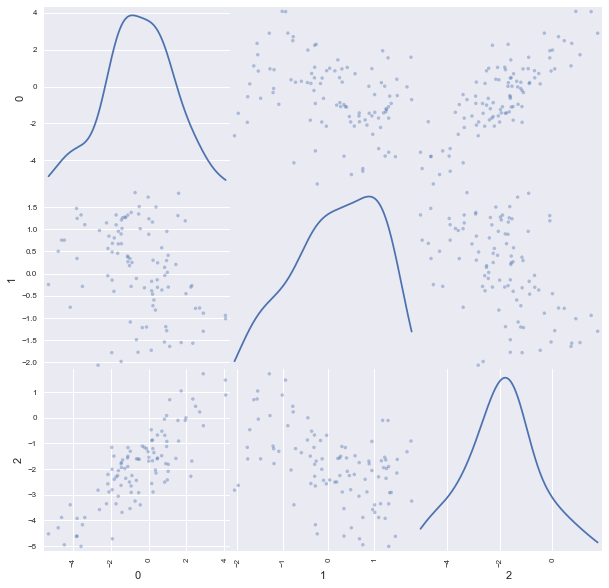

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.1257,0.9886,0.55502
1,0,0.2336,0.96,0.0040501
2,0.0521,0.0637,0.9875,0.47436


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 1)

Execution time: 0.027502775192260742 seconds


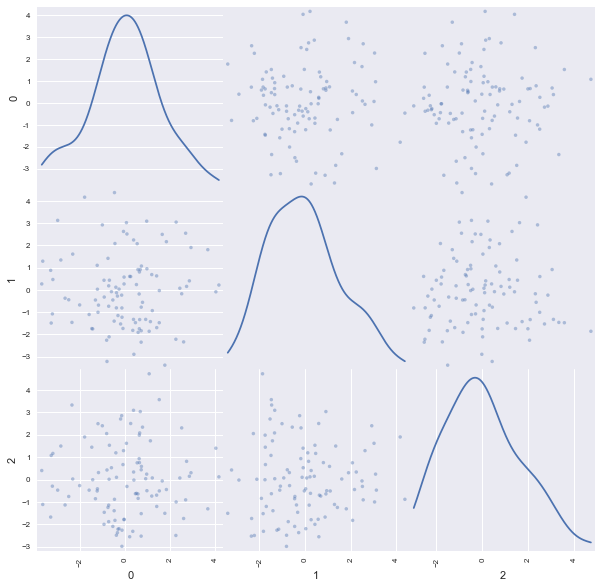

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.0325,0.1457,0.9835,0.24816
1,0.1223,0.164,0.9771,0.078146
2,0,0.2075,0.9765,0.070871


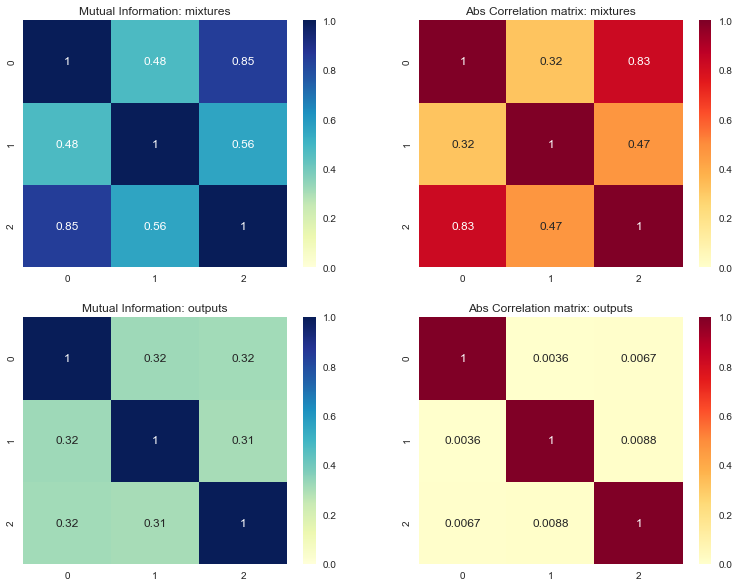

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 1) 

Execution time: 0.017002105712890625 seconds


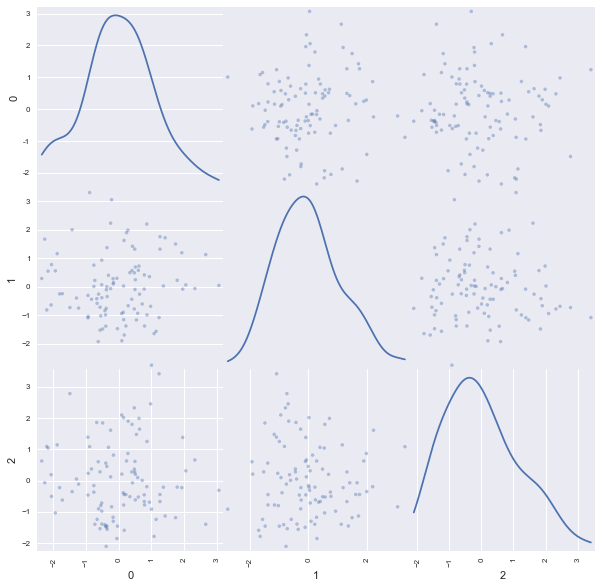

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.0341,0.141,0.9857,0.35517
1,0.0246,0.5295,0.9813,0.16672
2,0.0926,0.5732,0.9668,0.012676


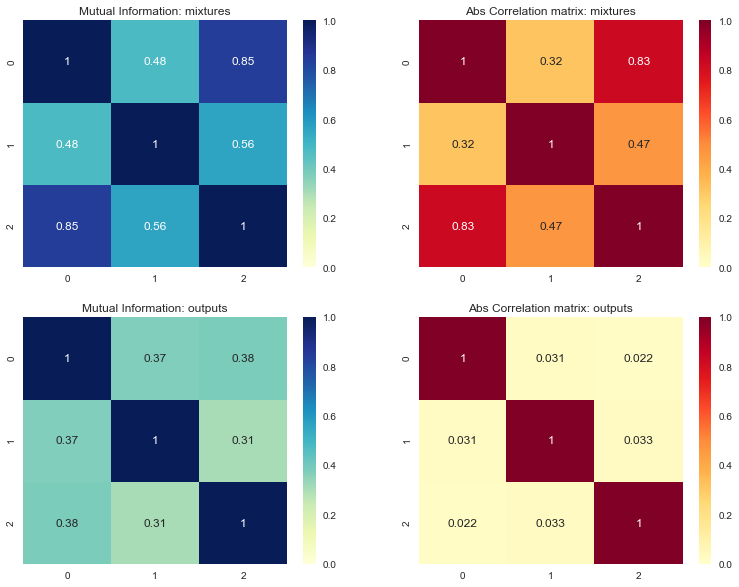

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, runs = 1)

Execution time: 0.01250147819519043 seconds


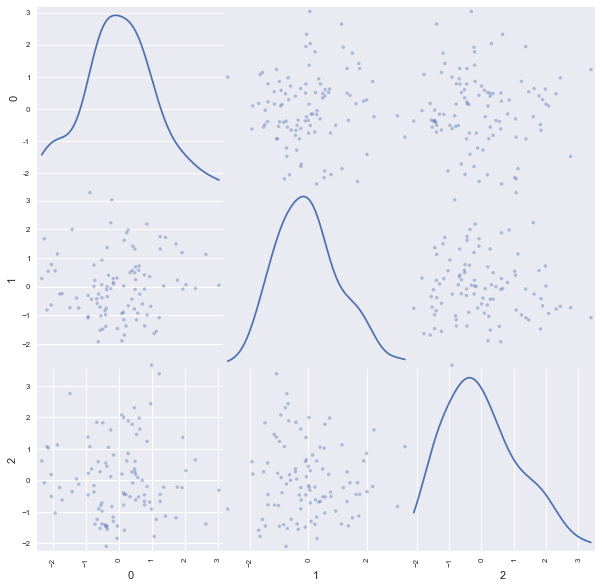

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,3.7953,0.9857,0.35596
1,0.0473,0.4204,0.9814,0.17079
2,0.0475,0.2622,0.9667,0.012434


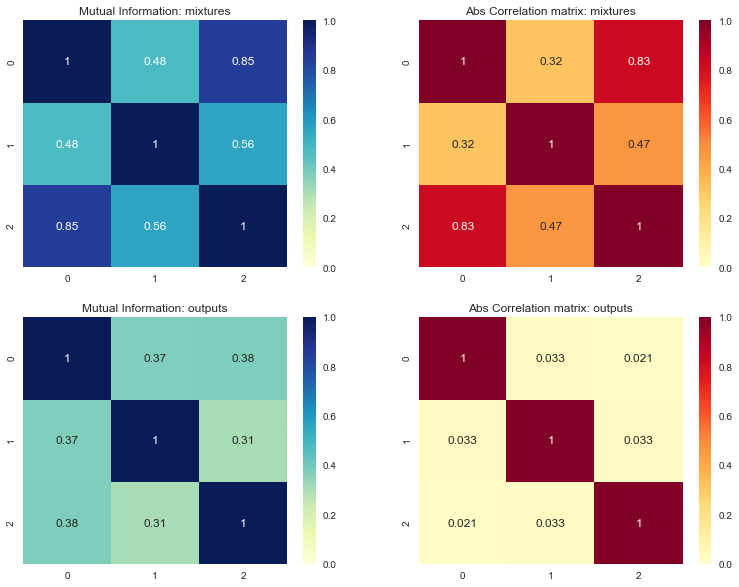

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Fontes conhecidas

In [15]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/ThirdSource100Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(3, 100)


,0,1,2
0,0.163667,-0.173921,-0.885369
1,-5.271492,-0.246001,-4.528208
2,-0.518739,1.344005,-2.921334
3,0.849294,0.141179,-2.507971
4,-1.446991,-1.980086,-2.635819


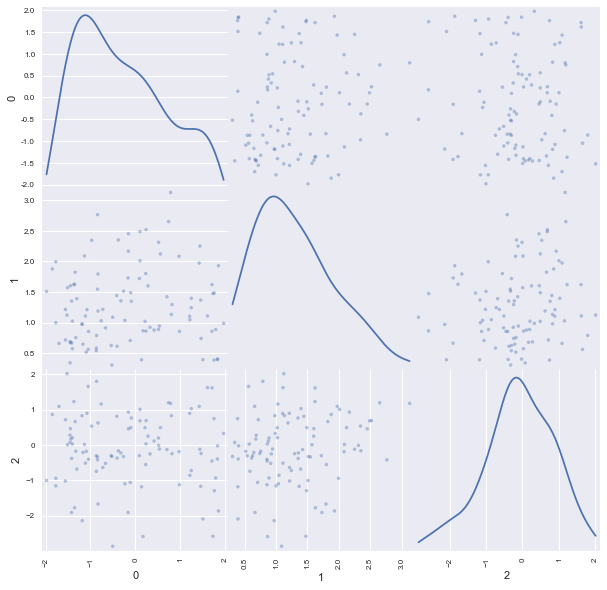

In [16]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(3, 100) (3, 100)
[[ 0.18283348  0.1763345   0.23968724]
 [ 0.31893287  0.16357436  0.03352154]
 [ 0.1989523   0.26717954  0.43507819]]


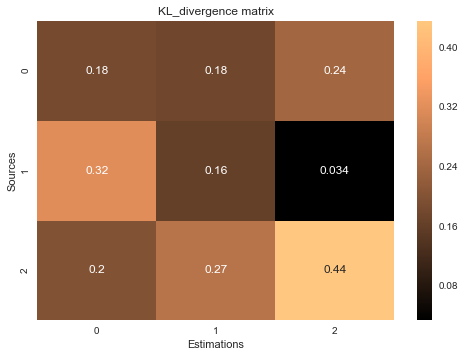

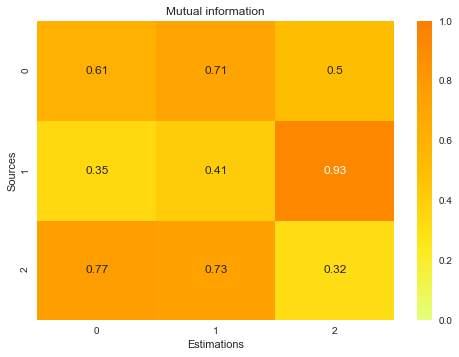

In [17]:
from evaluation import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(3, 100) (3, 100)
[[ 0.24662807  0.37587588  0.19270438]
 [ 0.23328485  0.36519895  0.04028206]
 [ 0.257687    0.26322786  0.44168508]]


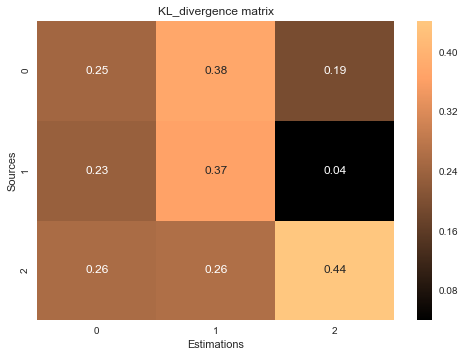

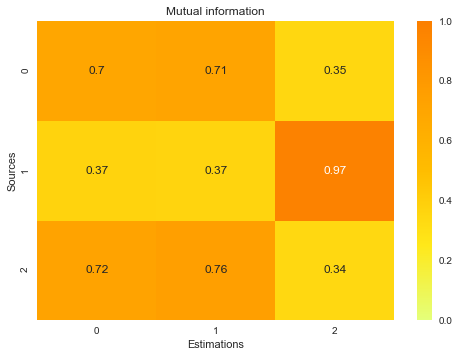

In [18]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(3, 100) (3, 100)
[[ 0.24662807  0.37587588  0.19270438]
 [ 0.24079535  0.36709247  0.04831838]
 [ 0.25370919  0.25814689  0.44345168]]


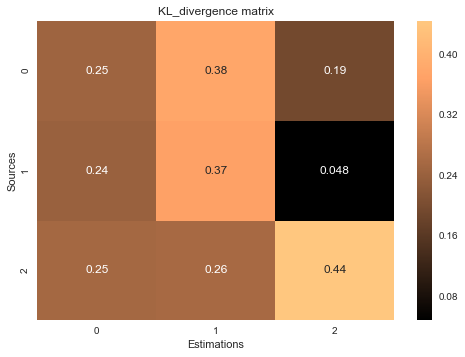

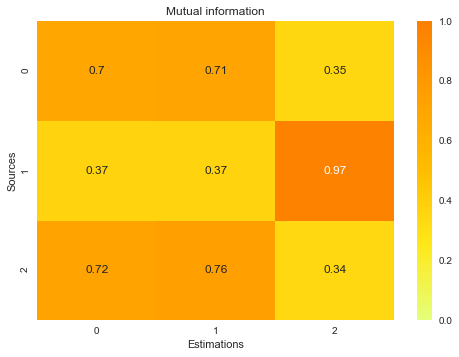

In [19]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)